In [107]:
import os
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np


W_ALL = {}
ADJ = {}


pops = {
    "ES": [0, 79],
    "EA": [80, 119],
    "EM": [140, 179]
}


def _displayAdj(A, name):
    A[A == 0] = np.NaN
    vmin = np.amin(A[np.logical_not(np.isnan(A))])
    vmax = np.amax(A[np.logical_not(np.isnan(A))])

    S = 5
    plt.figure(figsize=(S, S))

    plt.imshow(A, cmap='plasma', interpolation='nearest', vmin=vmin, vmax=vmax)
    plt.clim(vmin, vmax)

    xoffset = S * 5
    plt.xticks([-0.5, 39.5, 80], [' ' * xoffset + 'EA',' ' * xoffset +  'EM'])
    plt.xlabel('Post-synapse population')

    yoffset = int(S * 1.5)
    plt.yticks([-0.5, 79.5, 119.5], ['\n' * (yoffset*2) + 'ES', '\n' * yoffset + 'EA'])
    plt.ylabel('Pre-synapse population')
    plt.colorbar()
    plt.tight_layout()
    # plt.show()
    plt.savefig('adj-{}.png'.format(name), dpi=300)
    

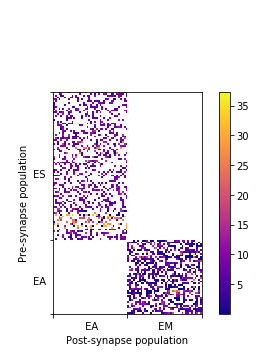

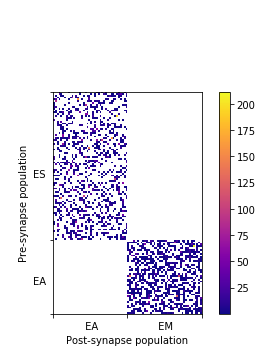

In [120]:
wdirs = ['results/hpsearch-2021-09-06/best/1_run_168',
        'results/20210907-ES1500it']
wdirnames = ['stdp', 'evol']

for wdir, wname in zip(wdirs, wdirnames):

    with open(os.path.join('../', wdir, 'synWeights_final.pkl'), 'rb') as f:
        W = pkl.load(f)

    W2 = {}
    for preid, pre_d in W.items():
        W2[preid] = {}
        for postid, v in pre_d.items():
            W2[preid][postid] = v[0][1]
    W = W2

    ids = sorted(list(set([preid for preid in W.keys()] + [postid for pre_map in W.values() for postid in pre_map.keys()])))


    A = np.zeros((max(ids)+1, max(ids)+1))
    for preid, pre_map in W.items():
        for postid, value in pre_map.items():
            A[preid][postid] = value        
    A = np.concatenate((A[0:120, 80:120], A[0:120, 140:180]), axis=1)


    _displayAdj(A, wname)
    W_ALL[wname] = W
    ADJ[wname] = A

In [121]:
ADJ['evol'].shape
ADJ['stdp'].shape

(120, 80)

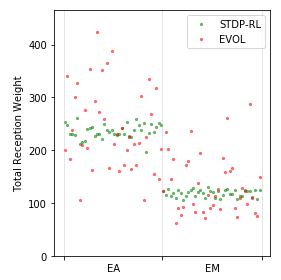

In [184]:

S = 4
plt.figure(figsize=(S, S))

maxy = 0
for k in ['stdp', 'evol']:
    A = ADJ[k]
    A[~(A >= 0)] = 0
    N = A.shape[1]
    y = np.sum(A, axis=0)
    plt.scatter(range(N), y, color='r' if k == 'evol' else 'g', s=5, alpha=0.5)
    maxy = max(np.max(y), maxy)
    
    
plt.ylim([0, maxy * 1.10])
plt.legend(['STDP-RL', 'EVOL'])


xoffset = int(S * 8)
plt.xticks([-0.5, 39.5, 80], [' ' * xoffset + 'EA',' ' * xoffset +  'EM'])
plt.grid(axis='x', alpha=0.4)
plt.ylabel('Total Reception Weight')
plt.tight_layout()
# plt.show()
plt.savefig('reception.png', dpi=300)


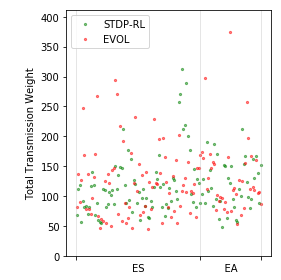

In [185]:

S = 4
plt.figure(figsize=(S, S))

maxy = 0
for k in ['stdp', 'evol']:
    A = ADJ[k]
    A[~(A >= 0)] = 0
    N = A.shape[0]
    y = np.sum(A, axis=1)
    plt.scatter(range(N), y, color='r' if k == 'evol' else 'g', s=5, alpha=0.5)
    maxy = max(np.max(y), maxy)
    
    
plt.ylim([0, maxy * 1.10])
plt.legend(['STDP-RL', 'EVOL'])


xoffset = int(S * 5)
plt.xticks([-0.5, 79.5, 119.5], [' ' * (xoffset*2) + 'ES', ' ' * xoffset + 'EA'])
plt.grid(axis='x', alpha=0.4)
plt.ylabel('Total Transmission Weight')
plt.tight_layout()
plt.savefig('transmission.png', dpi=300)
# plt.show()


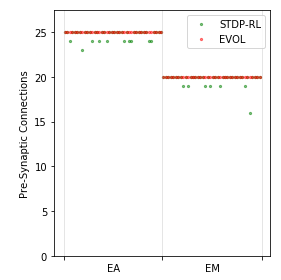

In [181]:

S = 4
plt.figure(figsize=(S, S))

maxy = 0
for k in ['stdp', 'evol']:
    A = ADJ[k]
    A[~(A >= 0)] = 0
    N = A.shape[1]
    y = np.sum(A > 0, axis=0)
    plt.scatter(range(N), y, color='r' if k == 'evol' else 'g', s=5, alpha=0.5)
    maxy = max(np.max(y), maxy)
    
    
plt.ylim([0, maxy * 1.10])
plt.legend(['STDP-RL', 'EVOL'])


xoffset = int(S * 8)
plt.xticks([-0.5, 39.5, 80], [' ' * xoffset + 'EA',' ' * xoffset +  'EM'])
plt.grid(axis='x', alpha=0.4)
plt.ylabel('Pre-Synaptic Connections')
plt.tight_layout()
# plt.show()
plt.savefig('presyn-conn.png', dpi=300)


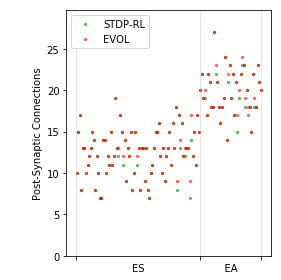

In [186]:

S = 4
plt.figure(figsize=(S, S))

maxy = 0
for k in ['stdp', 'evol']:
    A = ADJ[k]
    A[~(A >= 0)] = 0
    N = A.shape[0]
    y = np.sum(A > 0, axis=1)
    plt.scatter(range(N), y, color='r' if k == 'evol' else 'g', s=5, alpha=0.5)
    maxy = max(np.max(y), maxy)
    
    
plt.ylim([0, maxy * 1.10])
plt.legend(['STDP-RL', 'EVOL'])


xoffset = int(S * 5)
plt.xticks([-0.5, 79.5, 119.5], [' ' * (xoffset*2) + 'ES', ' ' * xoffset + 'EA'])
plt.grid(axis='x', alpha=0.4)
plt.ylabel('Post-Synaptic Connections')
plt.tight_layout()
# plt.show()
plt.savefig('postsyn-conn.png', dpi=300)
